## Name: Avanindra Singh

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
pdata = pd.read_csv('porter_data_1.csv')

In [9]:
pdata.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [10]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [14]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
pdata['created_at'] = pd.to_datetime(pdata['created_at'], format='%Y-%m-%d %H:%M:%S')


In [15]:
pdata['actual_delivery_time'] = pd.to_datetime(pdata['actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')

In [16]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [18]:
# Convert categorical features to category type
pdata['market_id'] = pdata['market_id'].apply(lambda x : int(x))
pdata['order_protocol'] = pdata['order_protocol'].apply(lambda x : int(x))

In [19]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [22]:
# Calculate time taken in minutes
pdata['time_taken'] = pdata['actual_delivery_time'] - pdata['created_at']
pdata['time_taken'] = pdata['time_taken'].apply(lambda x : x.total_seconds()/60)

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [24]:
# Extract the hour and day of week from the 'created_at' timestamp
pdata['delivery_hr'] = pdata['created_at'].dt.hour
pdata['delivery_day'] = pdata['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
pdata['is_weekend'] = pdata.apply(lambda x : 1 if x['delivery_day'] == 5 or x['delivery_day'] == 6 else 0, axis=1 )

In [25]:
# Drop unnecessary columns
pdata = pdata.drop(['created_at', 'actual_delivery_time'], axis=1)

In [26]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   store_primary_category    175777 non-null  int64  
 2   order_protocol            175777 non-null  int64  
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken                175777 non-null  float64
 13  delivery_hr               175777 non-null  i

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [29]:
# Define target variable (y) and features (X)
y = pdata['time_taken']
X = pdata.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [31]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


In [32]:
train_data, test_data = train_test_split(pdata, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
print("Training Data: ", train_data.shape)
print("Test Data: ", test_data.shape)

Training Data:  (123043, 16)
Test Data:  (52734, 16)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [36]:
# Define numerical and categorical columns for easy EDA and data manipulation
numeric_feat = ['total_items', 'num_distinct_items', 'subtotal', 'min_item_price', 
                'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                'total_outstanding_orders', 'distance', 'time_taken']
categorical_feat = ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend', 
                    'delivery_hr', 'delivery_day']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

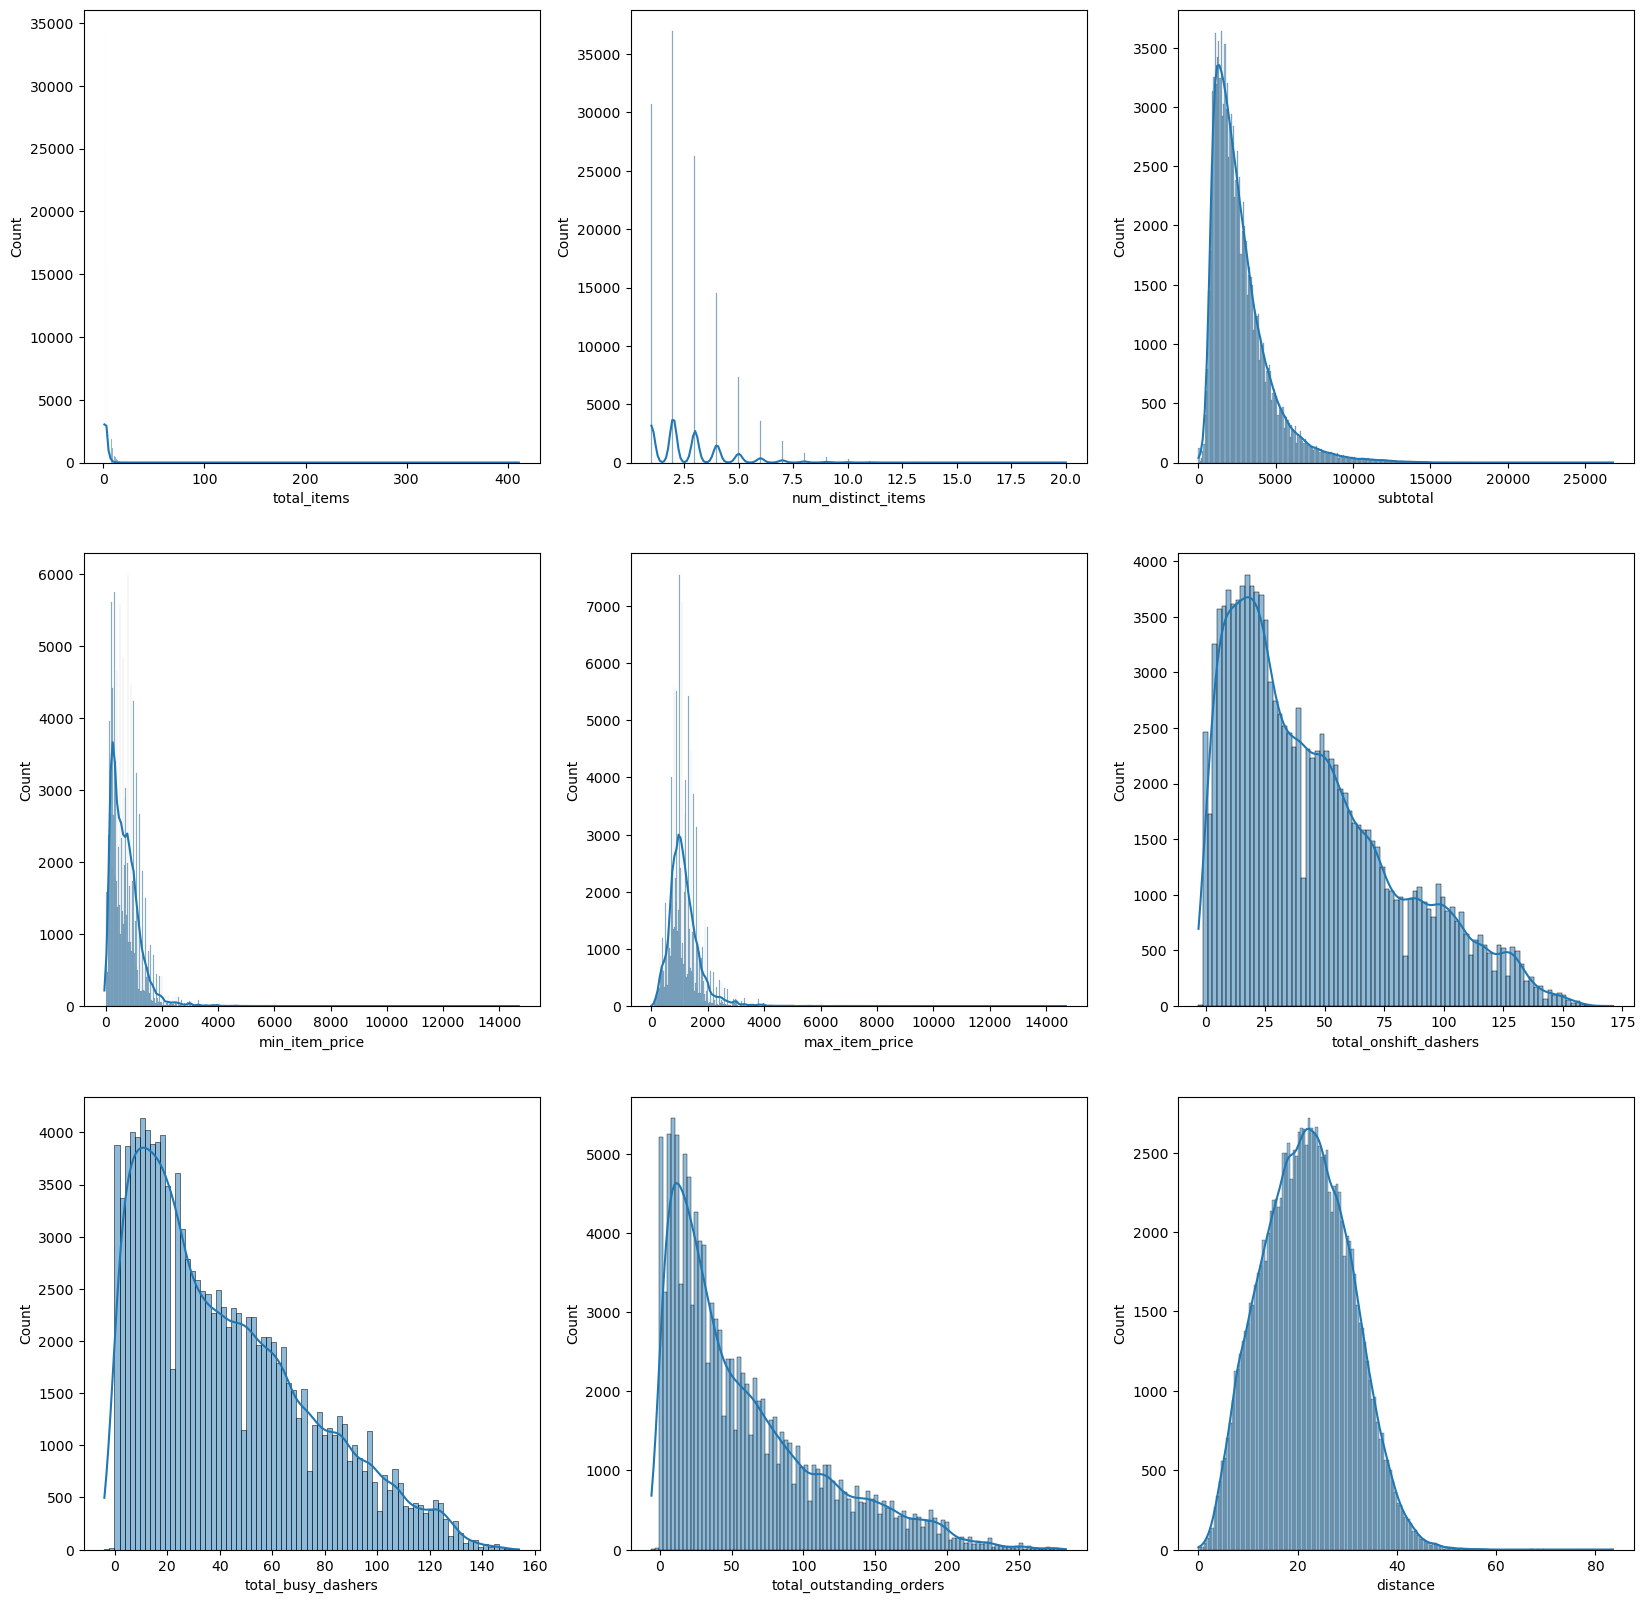

In [38]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 20))
for i in range(len(numeric_feat) - 1):
    plt.subplot(3,3,i+1)
    sns.histplot(x=train_data[numeric_feat[i]], kde=True)
plt.show()

In [39]:
train_data[numeric_feat].describe()

total_items  num_distinct_items       subtotal  min_item_price  \
count  123043.000000       123043.000000  123043.000000   123043.000000   
mean        3.206082            2.674951    2697.863625      684.784506   
std         2.745043            1.625552    1830.338637      520.731071   
min         1.000000            1.000000       0.000000      -52.000000   
25%         2.000000            2.000000    1417.000000      299.000000   
50%         3.000000            2.000000    2220.000000      595.000000   
75%         4.000000            3.000000    3405.000000      942.000000   
max       411.000000           20.000000   26800.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   123043.000000          123043.000000       123043.000000   
mean      1160.434645              44.981177           41.879180   
std        562.955073              34.568806           32.149659   
min          0.000000              -3.000000           -4.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance     time_taken  
count             123043.000000  123043.000000  123043.000000  
mean                  58.276651      21.830150      46.192656  
std                   52.689697       8.765038       9.332173  
min                   -6.000000       0.000000      32.000000  
25%                   17.000000      15.320000      39.000000  
50%                   41.000000      21.760000      45.000000  
75%                   85.000000      28.120000      52.000000  
max                  283.000000      83.520000     103.000000

In [40]:
train_data['total_items'].value_counts()

total_items
2      34349
1      24884
3      24594
4      15940
5       8716
6       5455
7       3178
8       1891
9       1151
10       776
11       512
12       416
13       256
14       207
15       153
16       127
17        75
18        68
19        44
20        42
21        29
22        28
24        19
25        17
26        16
28        14
30        11
29        10
27         9
23         9
42         5
34         5
33         5
40         4
48         3
39         3
35         3
36         3
31         3
32         2
38         2
47         1
44         1
45         1
41         1
56         1
66         1
37         1
411        1
64         1
Name: count, dtype: int64

In [41]:
train_data['num_distinct_items'].value_counts()

num_distinct_items
2     36970
1     30749
3     26228
4     14522
5      7345
6      3567
7      1805
8       853
9       478
10      268
11      130
12       60
13       33
14       17
15        9
16        5
18        2
20        1
17        1
Name: count, dtype: int64

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

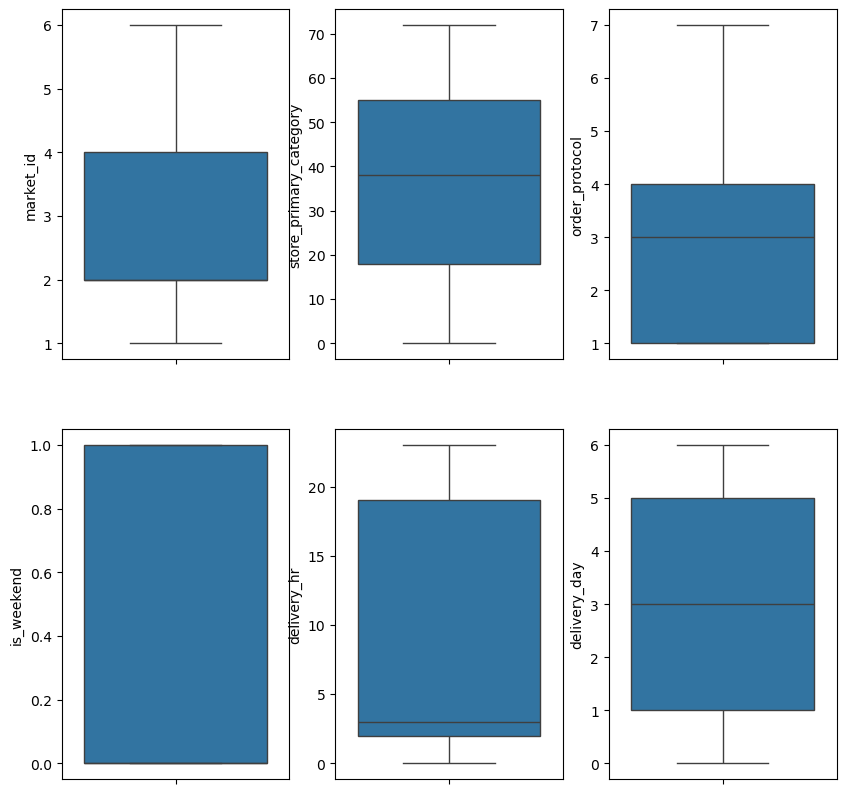

In [43]:
# Distribution of categorical columns
plt.figure(figsize=(10, 10))
for i in range(len(categorical_feat)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=train_data[categorical_feat[i]])
plt.show()

In [44]:
train_data['market_id'].value_counts()

market_id
2    37630
4    32453
1    25779
3    14770
5    11967
6      444
Name: count, dtype: int64

In [45]:
train_data['market_id'].median()

2.0

In [46]:
train_data['is_weekend'].value_counts()

is_weekend
0    80475
1    42568
Name: count, dtype: int64

In [47]:
train_data['is_weekend'].median()

0.0

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

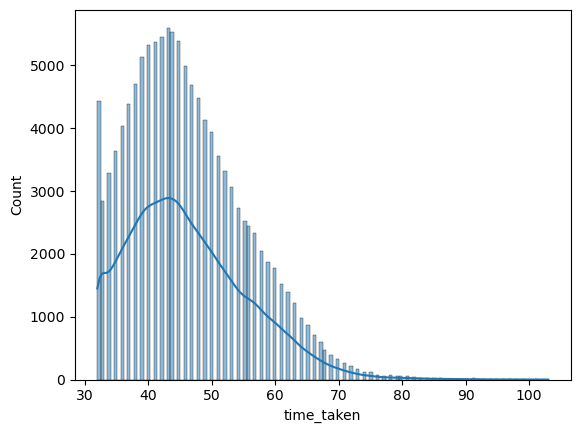

In [49]:
# Distribution of time_taken
sns.histplot(x=train_data['time_taken'], kde=True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

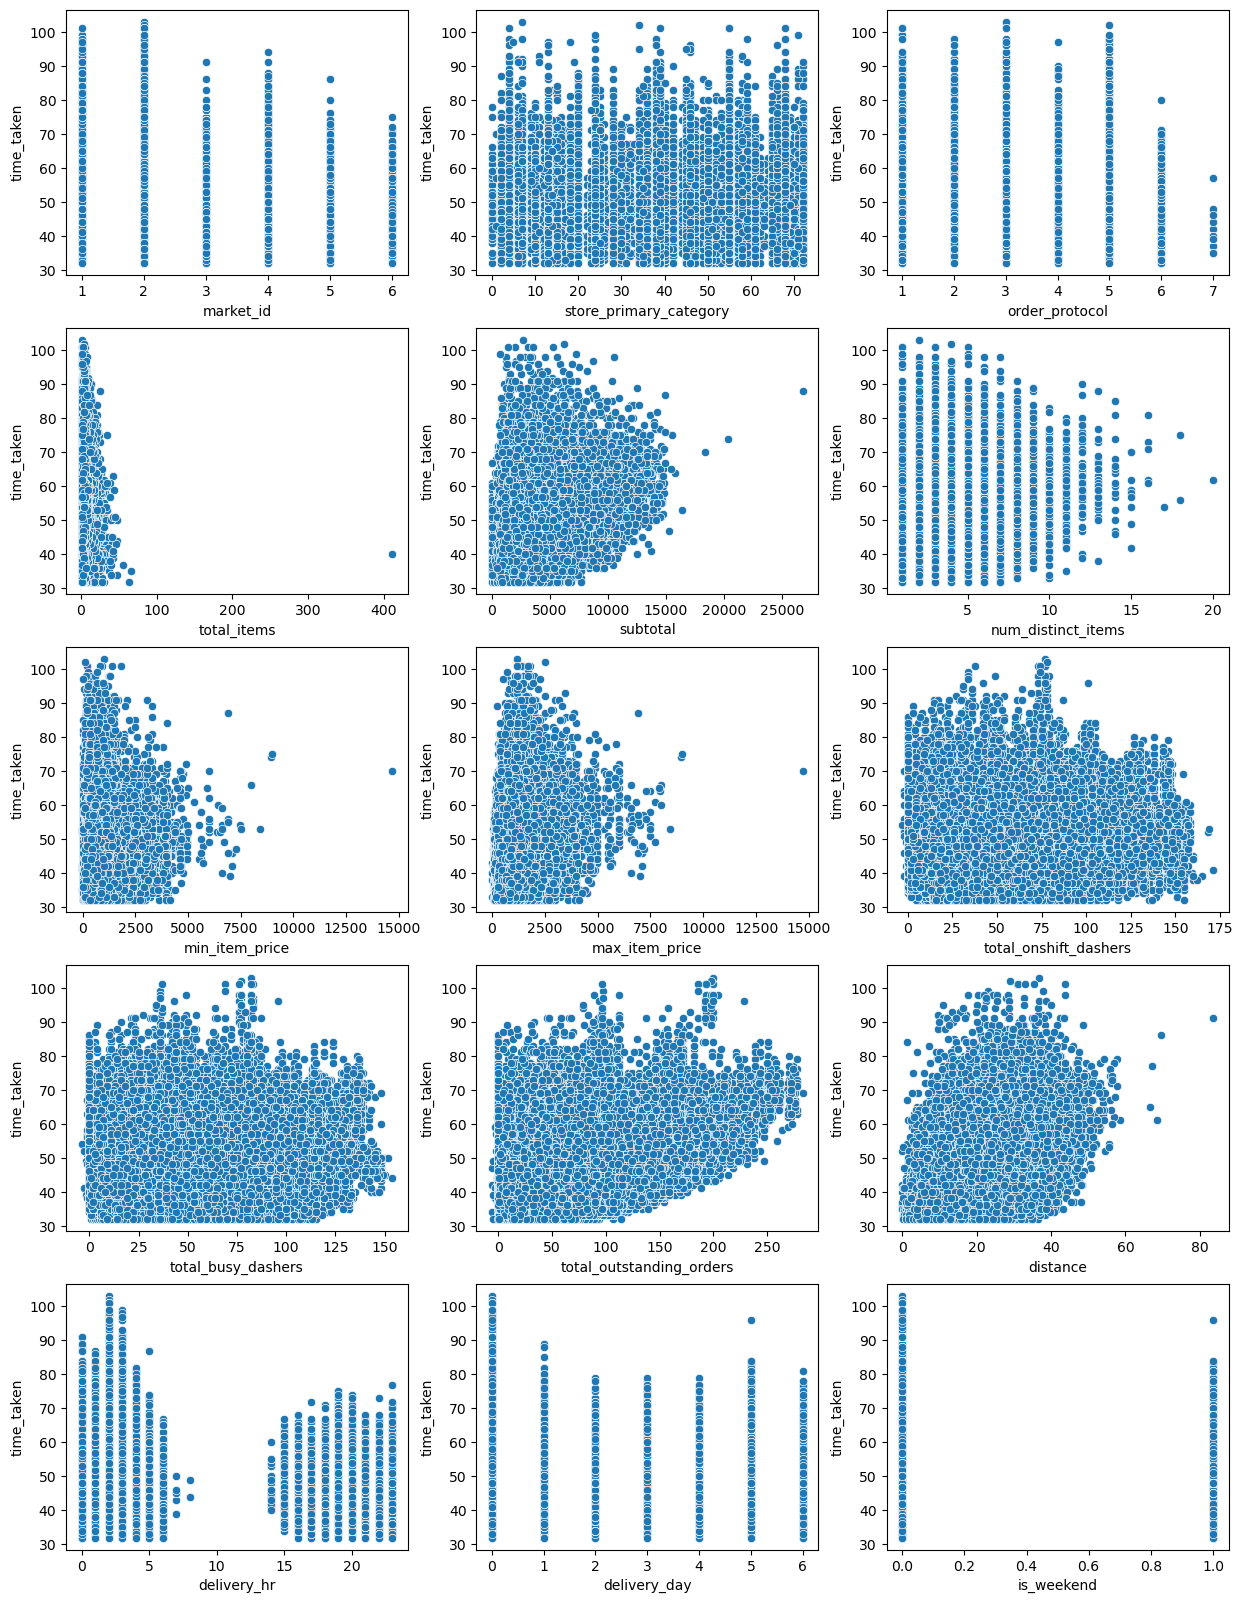

In [52]:
# Scatter plot to visualise the relationship between time_taken and other features
feature_list = train_data.columns.tolist()
feature_list.remove('time_taken')
plt.figure(figsize=(15, 20))
for i in range(len(feature_list)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=train_data[feature_list[i]], y=train_data['time_taken'])
plt.show()

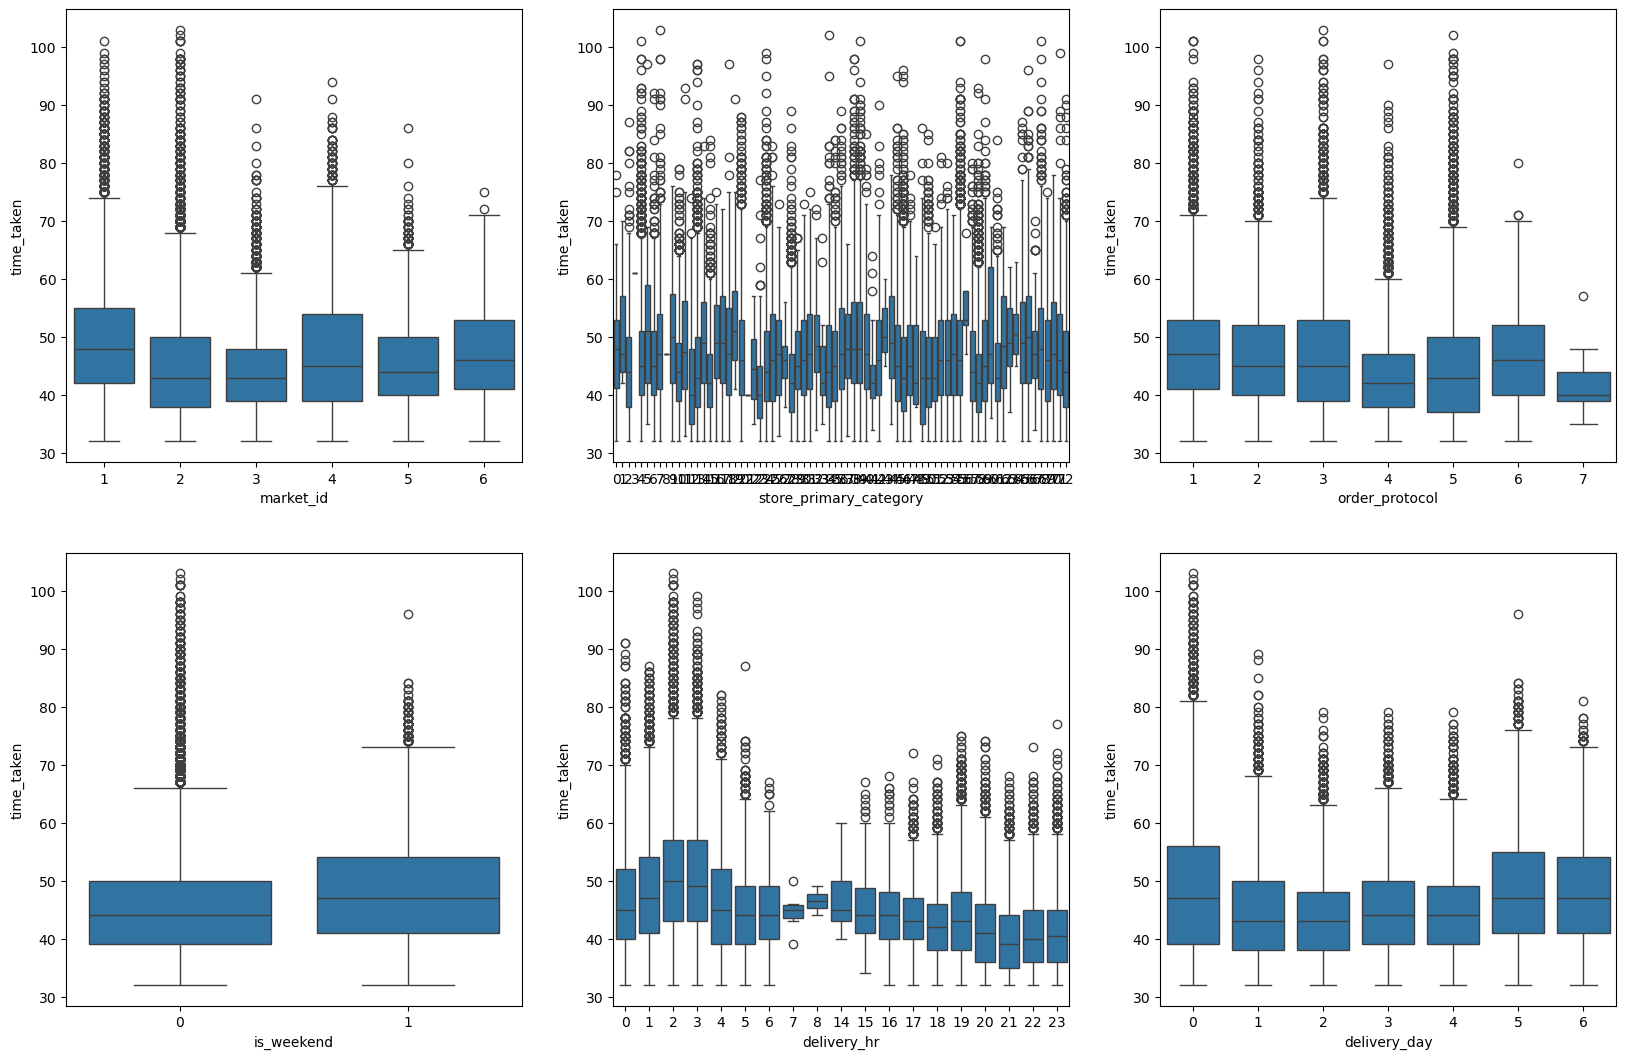

In [53]:
plt.figure(figsize=(20, 20))
for i in range(len(categorical_feat)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = categorical_feat[i], y = 'time_taken', data=train_data)
plt.show()

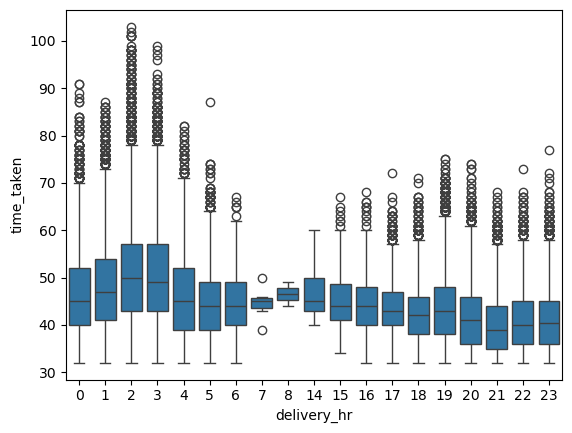

In [54]:
# Show the distribution of time_taken for different hours
sns.boxplot(x = categorical_feat[4], y = 'time_taken', data=train_data)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

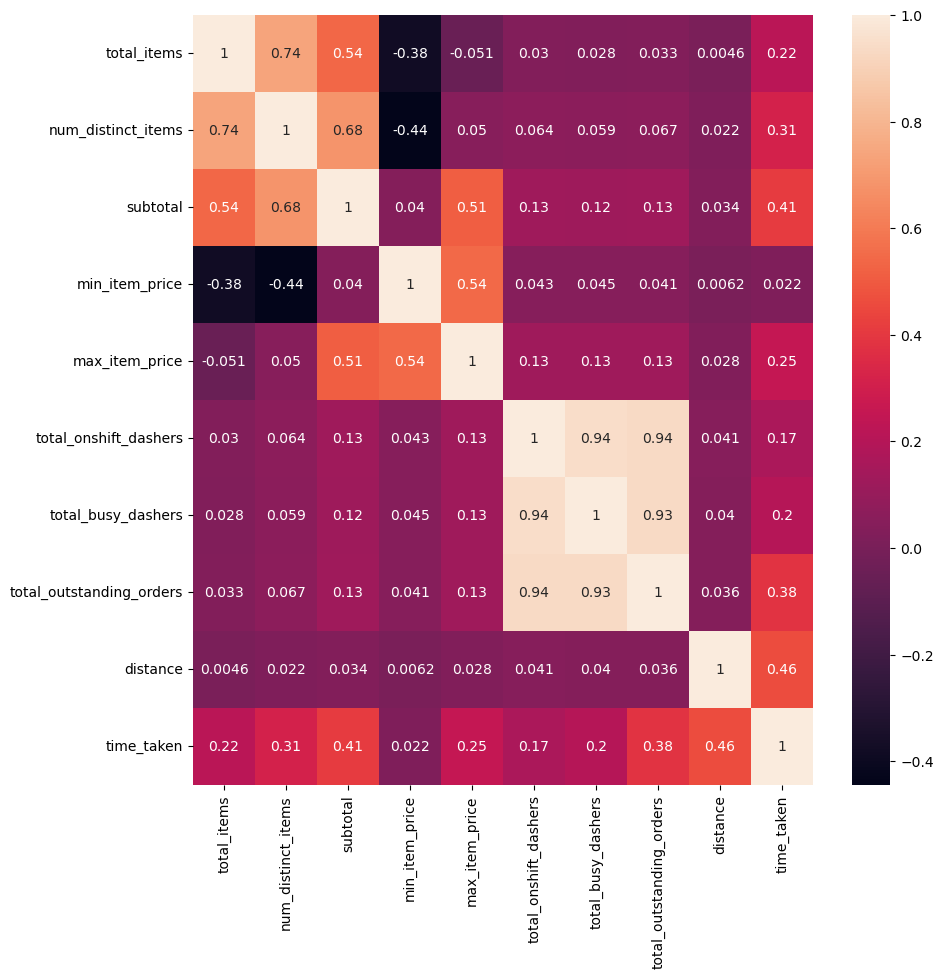

In [57]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(train_data[numeric_feat].corr(), annot=True)
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [59]:
# Drop 3-5 weakly correlated columns from training dataset
train_data_1 = train_data.drop(['market_id', 'store_primary_category', 'order_protocol', 'min_item_price', 'total_onshift_dashers'], axis=1)


In [60]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123043 entries, 94746 to 38408
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               123043 non-null  int64  
 1   subtotal                  123043 non-null  int64  
 2   num_distinct_items        123043 non-null  int64  
 3   max_item_price            123043 non-null  int64  
 4   total_busy_dashers        123043 non-null  float64
 5   total_outstanding_orders  123043 non-null  float64
 6   distance                  123043 non-null  float64
 7   time_taken                123043 non-null  float64
 8   delivery_hr               123043 non-null  int32  
 9   delivery_day              123043 non-null  int32  
 10  is_weekend                123043 non-null  int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 10.3 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

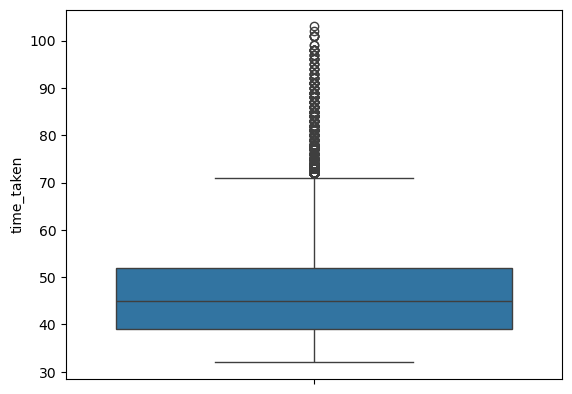

In [63]:
# Boxplot for time_taken
sns.boxplot(y=train_data_1['time_taken'])
plt.show()

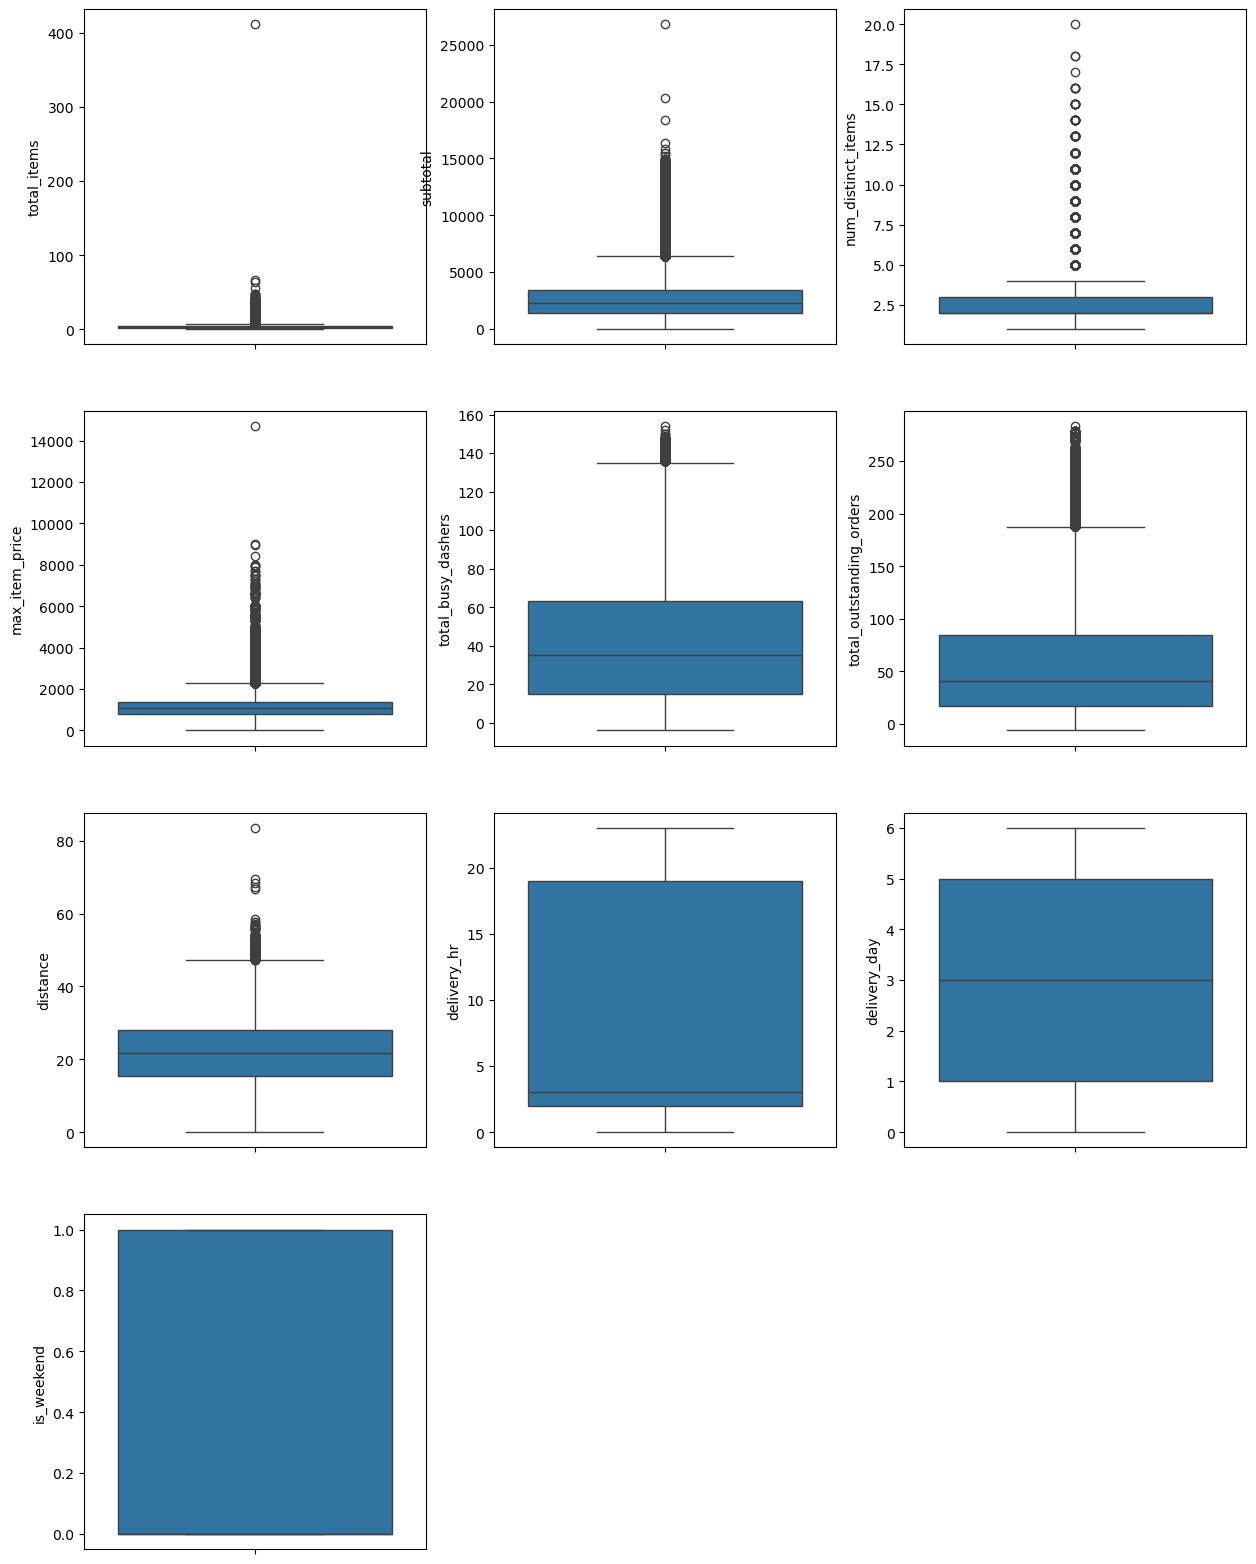

In [64]:
feat_list = train_data_1.columns.tolist()
feat_list.remove('time_taken')
plt.figure(figsize=(15, 20))
for i in range(len(feat_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = train_data_1[feat_list[i]], data=train_data)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [66]:
# Handle outliers
from scipy import stats
zscr = stats.zscore(train_data_1['time_taken'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

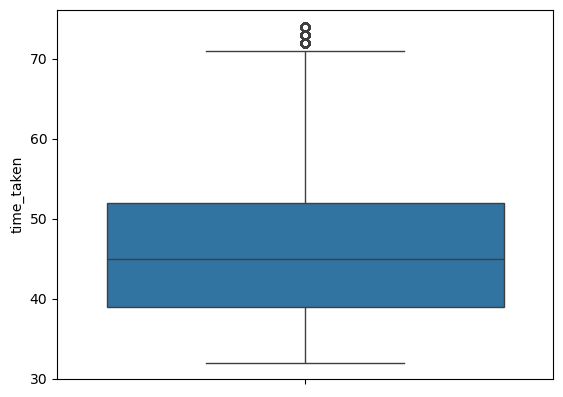

In [67]:
sns.boxplot(y=train_data_1['time_taken'])
plt.show()

Handling Outliers for `total_items`

In [69]:
zscr = stats.zscore(train_data_1['total_items'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `subtotal`

In [71]:
zscr = stats.zscore(train_data_1['subtotal'])
threshold = 2
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `num_distinct_items`

In [73]:
zscr = stats.zscore(train_data_1['num_distinct_items'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `max_item_price`

In [75]:
zscr = stats.zscore(train_data_1['max_item_price'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `total_busy_dashers`

In [77]:
zscr = stats.zscore(train_data_1['total_busy_dashers'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `total_outstanding_orders`

In [79]:
zscr = stats.zscore(train_data_1['total_outstanding_orders'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

Handling Outliers for `distance`

In [81]:
zscr = stats.zscore(train_data_1['distance'])
threshold = 3
train_data_1 = train_data_1[abs(zscr) <= threshold]

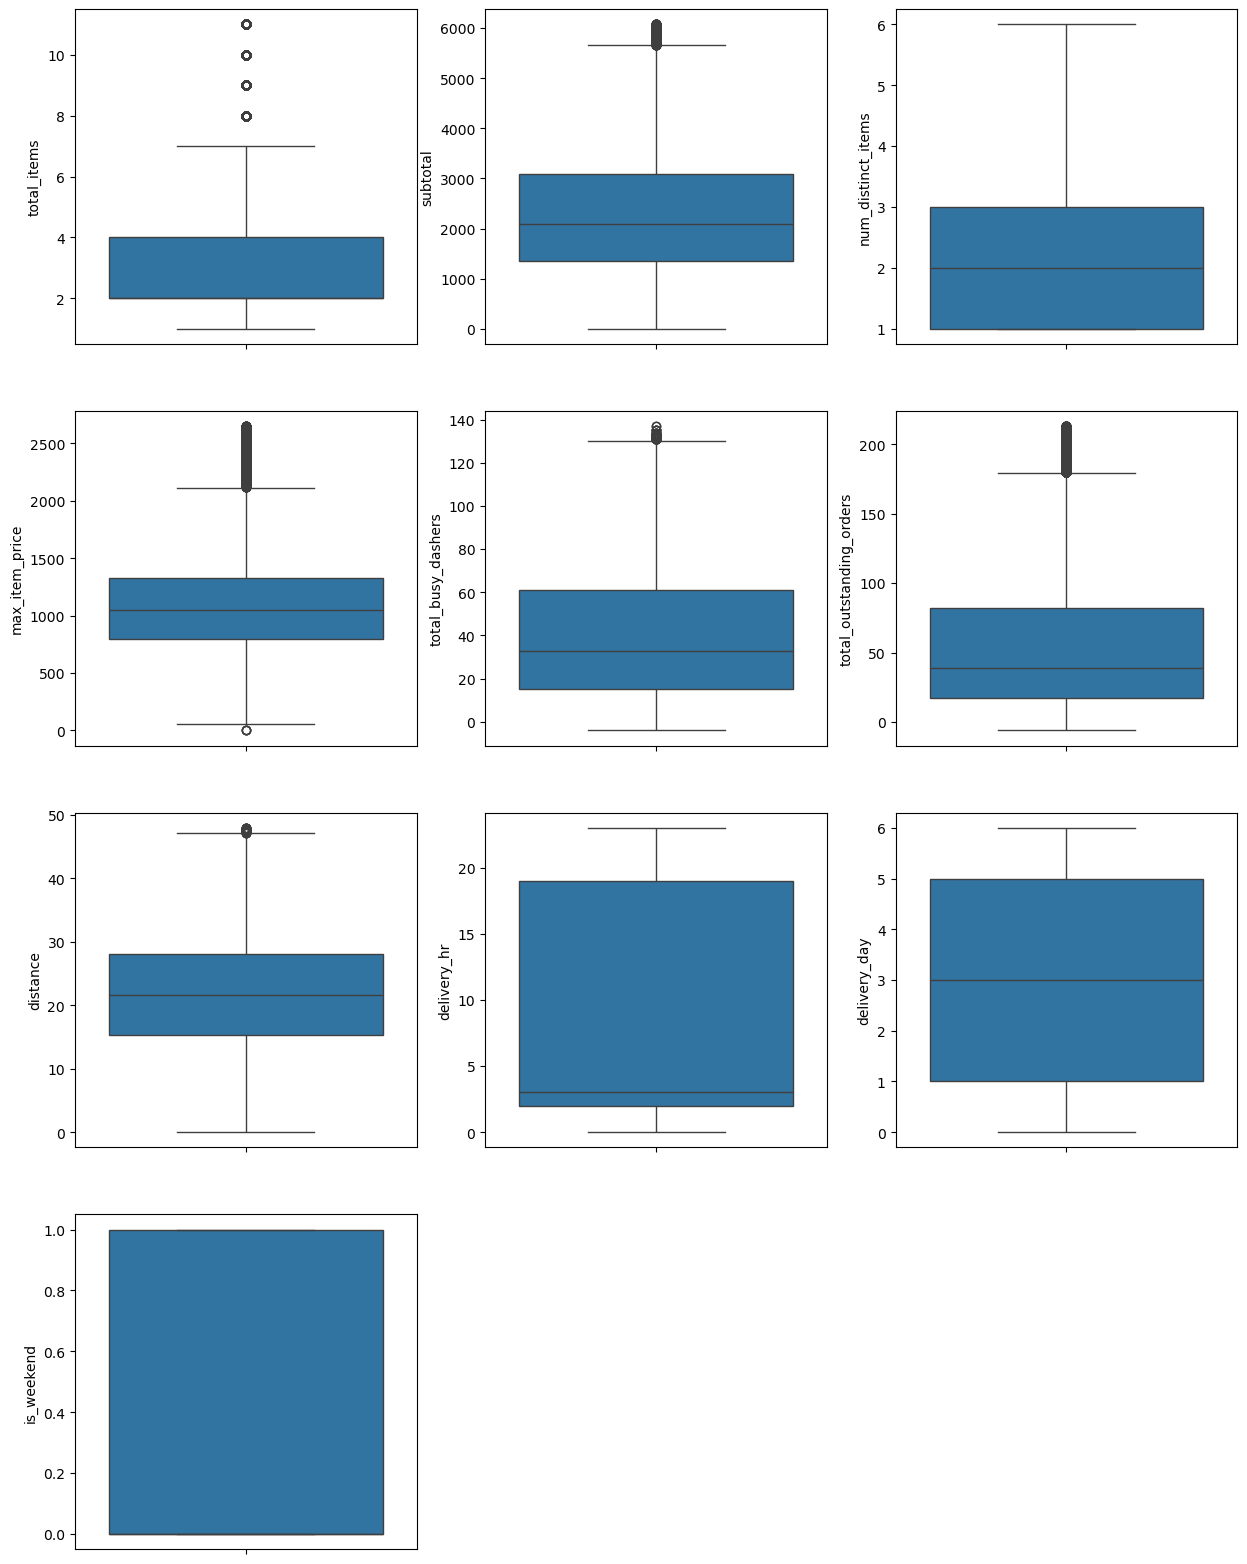

In [82]:
plt.figure(figsize=(15, 20))
for i in range(len(feat_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = train_data_1[feat_list[i]], data=train_data)
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [84]:
# Define numerical and categorical columns for easy EDA and data manipulation
print("Numerical Features: ", numeric_feat)
print("Categorical Features: ", categorical_feat)

Numerical Features:  ['total_items', 'num_distinct_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken']
Categorical Features:  ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend', 'delivery_hr', 'delivery_day']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

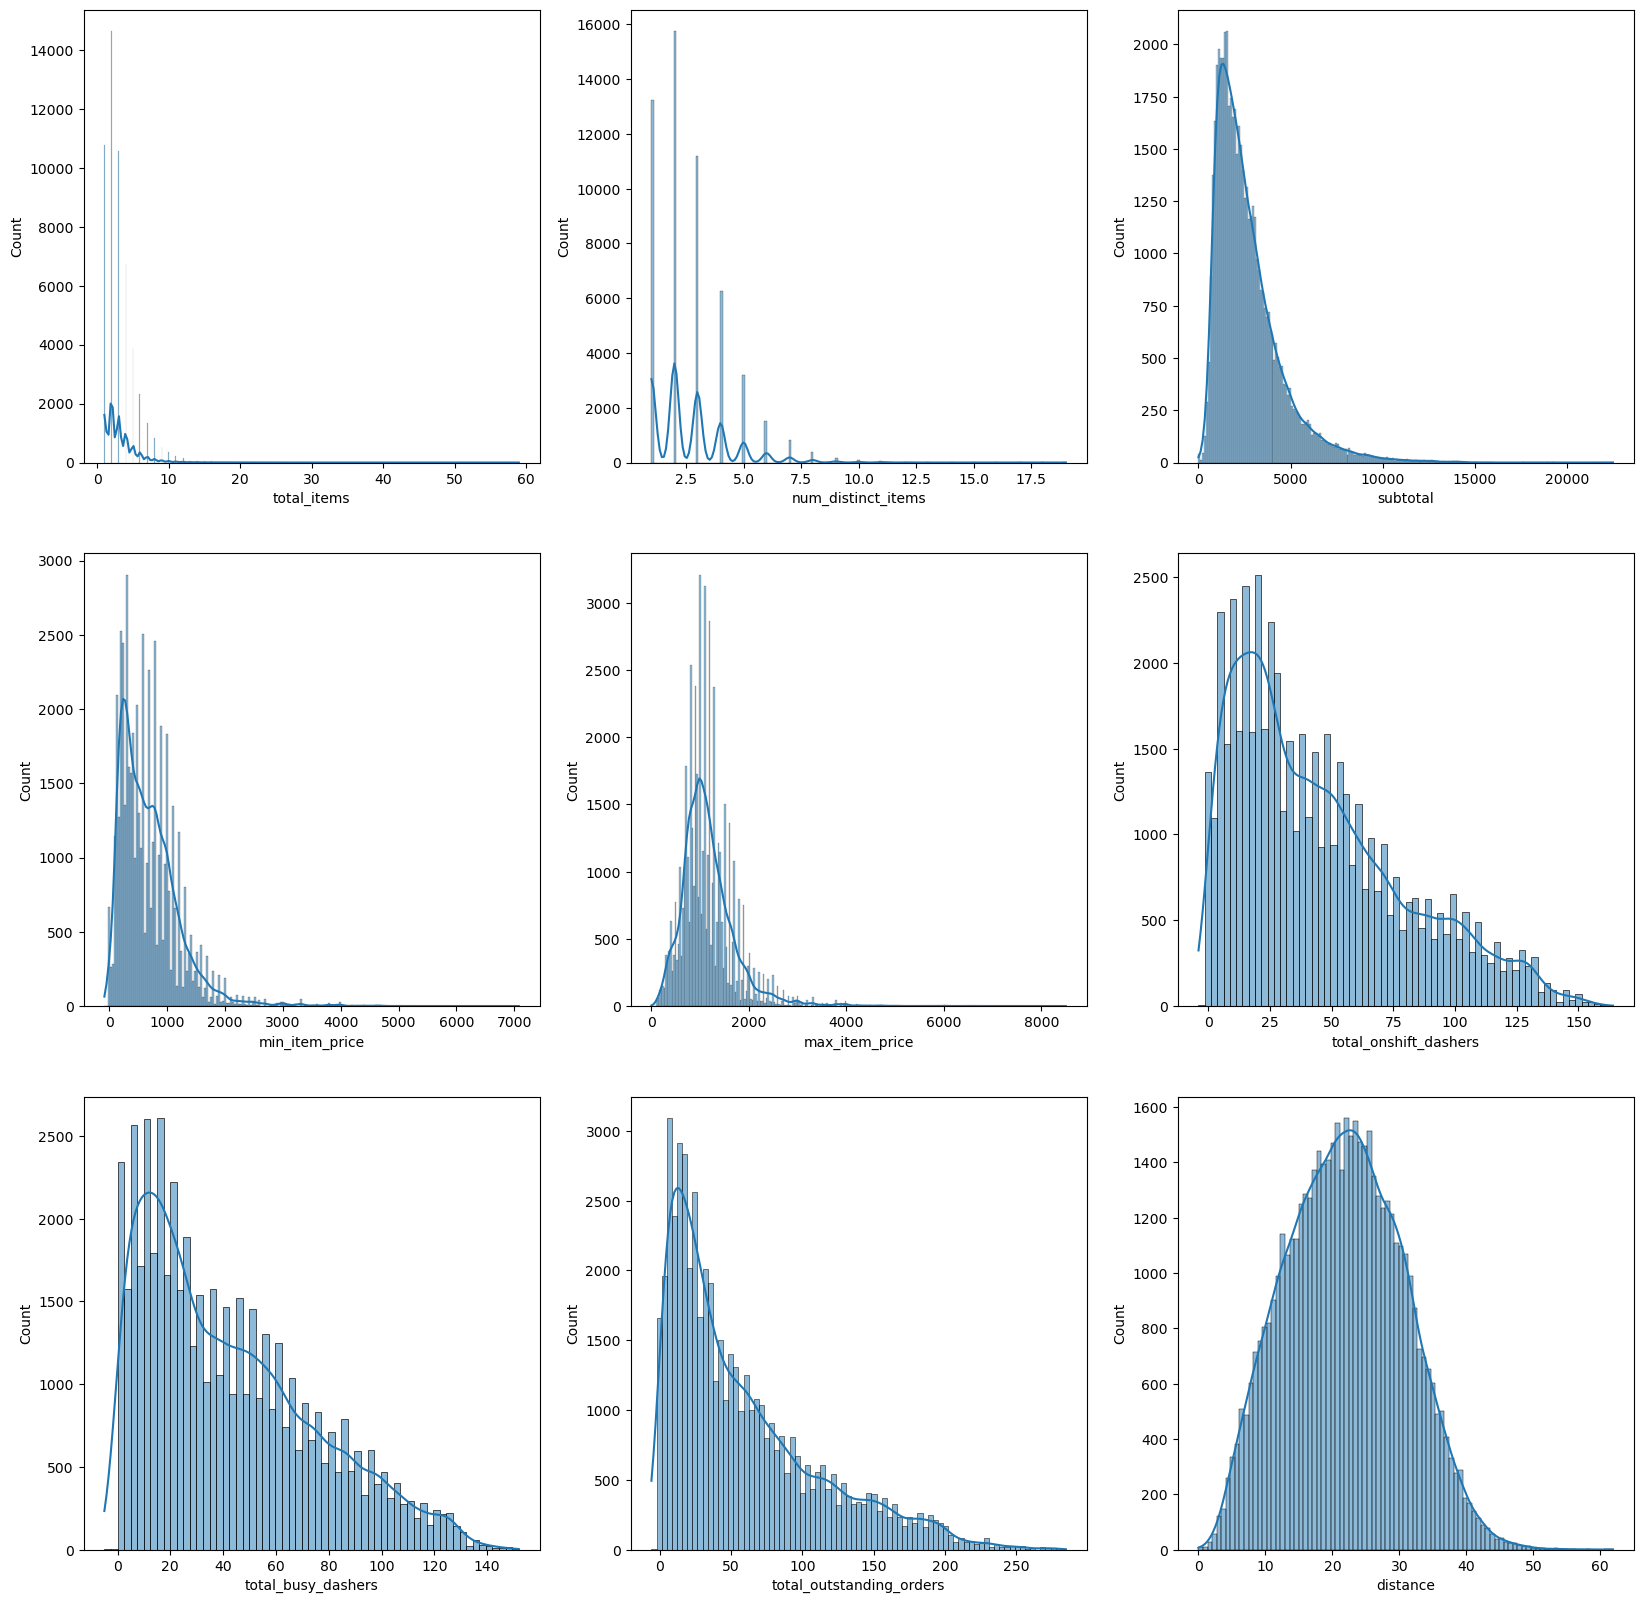

In [87]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 20))
for i in range(len(numeric_feat) - 1):
    plt.subplot(3,3,i+1)
    sns.histplot(x=test_data[numeric_feat[i]], kde=True)
plt.show()

##### **4.1.2**
Check the distribution of categorical features

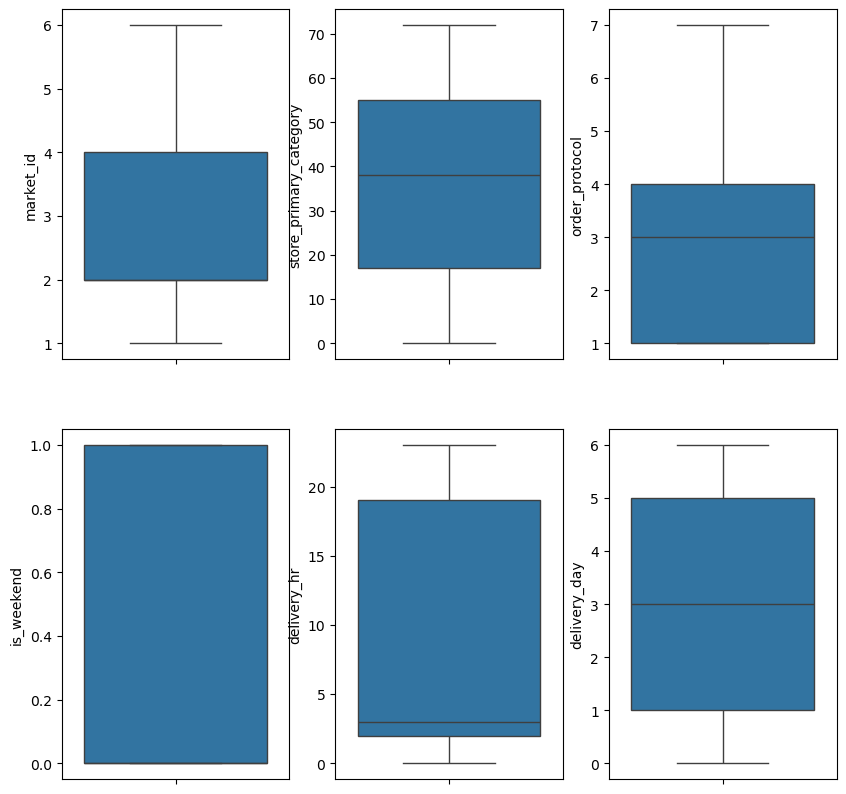

In [89]:
# Distribution of categorical columns
plt.figure(figsize=(10, 10))
for i in range(len(categorical_feat)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=test_data[categorical_feat[i]])
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

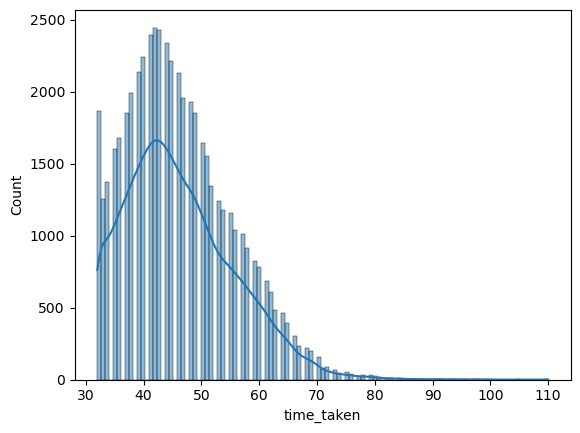

In [91]:
# Distribution of time_taken
sns.histplot(x=test_data['time_taken'], kde=True)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

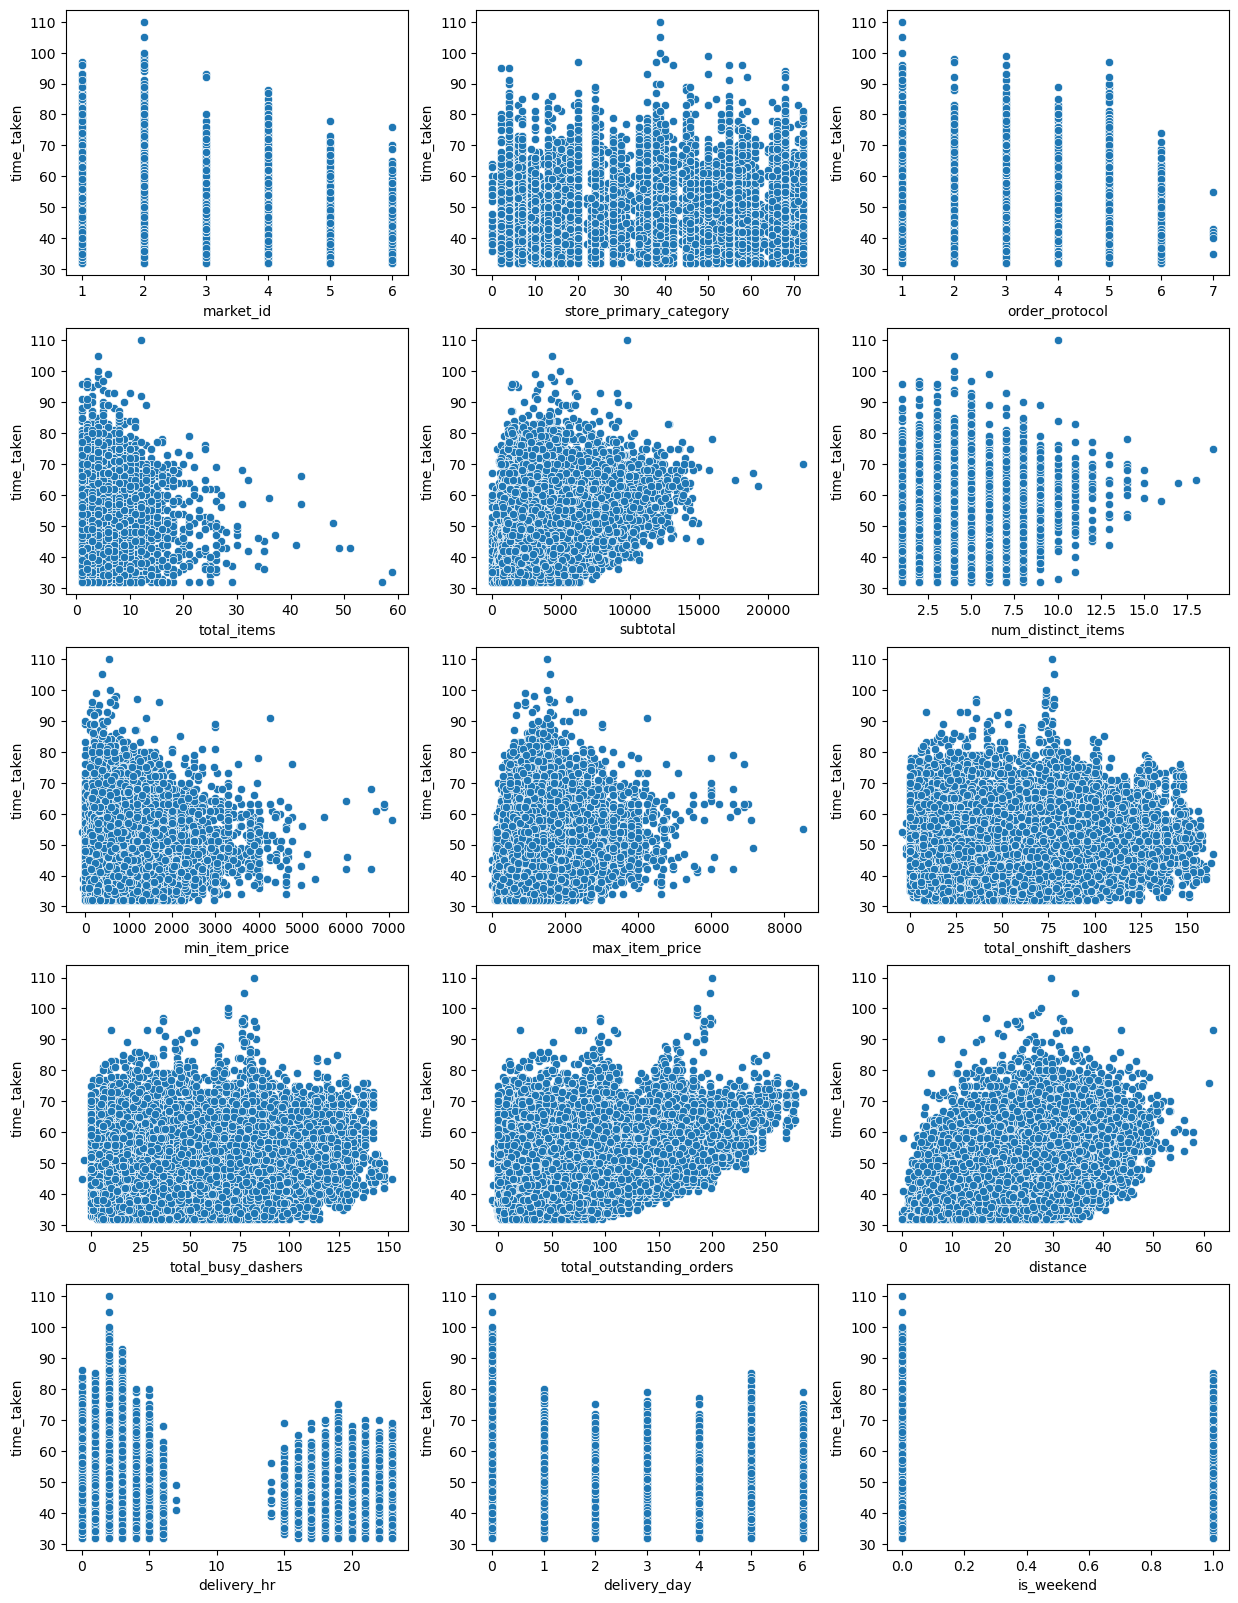

In [93]:
# Scatter plot to visualise the relationship between time_taken and other features
feature_list = test_data.columns.tolist()
feature_list.remove('time_taken')
plt.figure(figsize=(15, 20))
for i in range(len(feature_list)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=test_data[feature_list[i]], y=test_data['time_taken'])
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [95]:
# Drop the weakly correlated columns from training dataset
test_data_1 = test_data.drop(['market_id', 'store_primary_category', 'order_protocol', 'min_item_price', 'total_onshift_dashers'], axis=1)


In [96]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52734 entries, 139667 to 3735
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_items               52734 non-null  int64  
 1   subtotal                  52734 non-null  int64  
 2   num_distinct_items        52734 non-null  int64  
 3   max_item_price            52734 non-null  int64  
 4   total_busy_dashers        52734 non-null  float64
 5   total_outstanding_orders  52734 non-null  float64
 6   distance                  52734 non-null  float64
 7   time_taken                52734 non-null  float64
 8   delivery_hr               52734 non-null  int32  
 9   delivery_day              52734 non-null  int32  
 10  is_weekend                52734 non-null  int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 4.4 MB


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [99]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [101]:
# Apply scaling to the numerical columns
train_data_feats = train_data_1.columns.tolist()
train_data_feats.remove('is_weekend')

In [102]:
train_data_1[train_data_feats].head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746             2      1790                   2             995   
173338            1       845                   1             795   
37592             1      1900                   1            1200   
42763             6       463                   3             299   
27506             3      3500                   3            1200   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  \
94746                  9.0                      15.0     18.04        41.0   
173338                76.0                     136.0     24.28        41.0   
37592                 21.0                      28.0     28.24        44.0   
42763                 87.0                     129.0     13.88        40.0   
27506                 13.0                      17.0      8.00        44.0   

        delivery_hr  delivery_day  
94746            18             0  
173338            2             5  
37592            23             6  
42763             1             5  
27506             5             5

In [103]:
train_data_2 = train_data_1.copy()

In [104]:
scaler = MinMaxScaler()

In [105]:
train_data_2[train_data_feats] = scaler.fit_transform(train_data_1[train_data_feats])

In [106]:
train_data_2.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746           0.1  0.294650                 0.2        0.375472   
173338          0.0  0.139095                 0.0        0.300000   
37592           0.0  0.312757                 0.0        0.452830   
42763           0.5  0.076214                 0.4        0.112830   
27506           0.2  0.576132                 0.4        0.452830   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  \
94746             0.092199                  0.095890  0.376147    0.214286   
173338            0.567376                  0.648402  0.506255    0.214286   
37592             0.177305                  0.155251  0.588824    0.285714   
42763             0.645390                  0.616438  0.289408    0.190476   
27506             0.120567                  0.105023  0.166806    0.285714   

        delivery_hr  delivery_day  is_weekend  
94746      0.782609      0.000000           0  
173338     0.086957      0.833333           1  
37592      1.000000      1.000000           1  
42763      0.043478      0.833333           1  
27506      0.217391      0.833333           1

In [107]:
train_data_2.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  110758.000000  110758.000000       110758.000000   110758.000000   
mean        0.180834       0.384336            0.286249        0.412312   
std         0.162455       0.203413            0.250432        0.162117   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.100000       0.223539            0.000000        0.301509   
50%         0.100000       0.343210            0.200000        0.394340   
75%         0.300000       0.506996            0.400000        0.500000   
max         1.000000       1.000000            1.000000        1.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       110758.000000             110758.000000  110758.000000   
mean             0.315863                  0.281128       0.453049   
std              0.219707                  0.225805       0.181132   
min              0.000000                  0.000000       0.000000   
25%              0.134752                  0.105023       0.317765   
50%              0.262411                  0.205479       0.452043   
75%              0.460993                  0.401826       0.583820   
max              1.000000                  1.000000       1.000000   

          time_taken    delivery_hr   delivery_day     is_weekend  
count  110758.000000  110758.000000  110758.000000  110758.000000  
mean        0.312798       0.380549       0.536378       0.339334  
std         0.201966       0.380506       0.338660       0.473486  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.166667       0.086957       0.166667       0.000000  
50%         0.285714       0.130435       0.500000       0.000000  
75%         0.428571       0.826087       0.833333       1.000000  
max         1.000000       1.000000       1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [111]:
# Create/Initialise the model


In [112]:
X_train = train_data_2.drop('time_taken', axis=1)
y_train = train_data_2[['time_taken']]
print(X_train.shape)
print(y_train.shape)

(110758, 10)
(110758, 1)


In [113]:
X_train_sm = sm.add_constant(X_train)

In [114]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110758 entries, 94746 to 38408
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     110758 non-null  float64
 1   total_items               110758 non-null  float64
 2   subtotal                  110758 non-null  float64
 3   num_distinct_items        110758 non-null  float64
 4   max_item_price            110758 non-null  float64
 5   total_busy_dashers        110758 non-null  float64
 6   total_outstanding_orders  110758 non-null  float64
 7   distance                  110758 non-null  float64
 8   delivery_hr               110758 non-null  float64
 9   delivery_day              110758 non-null  float64
 10  is_weekend                110758 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 10.1 MB


In [115]:
X_train_sm.head()

const  total_items  subtotal  num_distinct_items  max_item_price  \
94746     1.0          0.1  0.294650                 0.2        0.375472   
173338    1.0          0.0  0.139095                 0.0        0.300000   
37592     1.0          0.0  0.312757                 0.0        0.452830   
42763     1.0          0.5  0.076214                 0.4        0.112830   
27506     1.0          0.2  0.576132                 0.4        0.452830   

        total_busy_dashers  total_outstanding_orders  distance  delivery_hr  \
94746             0.092199                  0.095890  0.376147     0.782609   
173338            0.567376                  0.648402  0.506255     0.086957   
37592             0.177305                  0.155251  0.588824     1.000000   
42763             0.645390                  0.616438  0.289408     0.043478   
27506             0.120567                  0.105023  0.166806     0.217391   

        delivery_day  is_weekend  
94746       0.000000           0  
173338      0.833333           1  
37592       1.000000           1  
42763       0.833333           1  
27506       0.833333           1

In [116]:
# Train the model using the training data


In [117]:
lr_model1 = sm.OLS(y_train, X_train_sm).fit()

In [118]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 2.427e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:12:44   Log-Likelihood:                 84287.
No. Observations:              110758   AIC:                        -1.686e+05
Df Residuals:                  110747   BIC:                        -1.684e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0400      0.002     24.104      0.000       0.037       0.043
total_items                 -0.0137      0.005     -2.985      0.003      -0.023      -0.005
subtotal                     0.1878      0.003     59.123      0.000       0.182       0.194
num_distinct_items           0.0615      0.003     22.358      0.000       0.056       0.067
max_item_price               0.0454      0.003     14.340      0.000       0.039       0.052
total_busy_dashers          -1.1742      0.004   -271.617      0.000      -1.183      -1.166
total_outstanding_orders     1.2576      0.004    296.984      0.000       1.249       1.266
distance                     0.5288      0.002    281.581      0.000       0.525       0.533
delivery_hr                 -0.1102      0.001   -112.437      0.000      -0.112      -0.108
delivery_day                -0.0831      0.002    -49.179      0.000      -0.086      -0.080
is_weekend                   0.0917      0.001     75.714      0.000       0.089       0.094
==============================================================================
Omnibus:                     3025.901   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6095.521
Skew:                           0.185   Prob(JB):                         0.00
Kurtosis:                       4.088   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Make predictions
test_data_2 = test_data_1.copy()

In [120]:
test_data_2[train_data_feats] = scaler.transform(test_data_1[train_data_feats])

In [121]:
test_data_2.head()

total_items  subtotal  num_distinct_items  max_item_price  \
139667          0.2  0.213169                 0.2        0.375472   
80077           0.1  0.485597                 0.0        0.462264   
41872           0.0  0.229630                 0.0        0.526415   
165269          0.1  0.488395                 0.2        0.471321   
151215          0.2  0.205761                 0.2        0.150943   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  \
139667            0.446809                  0.305936  0.428691    0.166667   
80077             0.148936                  0.100457  0.267723    0.238095   
41872             0.219858                  0.232877  0.350292    0.380952   
165269            0.929078                  0.940639  0.396163    0.547619   
151215            0.241135                  0.178082  0.557131    0.119048   

        delivery_hr  delivery_day  is_weekend  
139667     0.130435      0.666667           0  
80077      0.043478      0.833333           1  
41872      0.130435      0.500000           0  
165269     0.130435      0.833333           1  
151215     0.956522      0.833333           1

In [122]:
test_data_2.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  52734.000000  52734.000000        52734.000000    52734.000000   
mean       0.220239      0.443680            0.335063        0.437553   
std        0.250062      0.300313            0.325199        0.209751   
min        0.000000      0.000000            0.000000        0.000000   
25%        0.100000      0.230453            0.000000        0.301509   
50%        0.200000      0.366255            0.200000        0.413208   
75%        0.300000      0.562140            0.400000        0.526415   
max        5.800000      3.703704            3.600000        3.207547   

       total_busy_dashers  total_outstanding_orders      distance  \
count        52734.000000              52734.000000  52734.000000   
mean             0.324963                  0.292792      0.456073   
std              0.228459                  0.241223      0.181620   
min             -0.007092                  0.000000      0.000000   
25%              0.134752                  0.105023      0.321101   
50%              0.276596                  0.214612      0.455379   
75%              0.468085                  0.415525      0.587156   
max              1.106383                  1.328767      1.290242   

         time_taken   delivery_hr  delivery_day    is_weekend  
count  52734.000000  52734.000000  52734.000000  52734.000000  
mean       0.338742      0.369038      0.535685      0.344806  
std        0.221819      0.377087      0.341640      0.475309  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.166667      0.086957      0.166667      0.000000  
50%        0.309524      0.130435      0.500000      0.000000  
75%        0.476190      0.826087      0.833333      1.000000  
max        1.857143      1.000000      1.000000      1.000000

In [123]:
X_test = test_data_2.drop('time_taken', axis=1)
y_test = test_data_2[['time_taken']]
print(X_test.shape)
print(y_test.shape)

(52734, 10)
(52734, 1)


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52734 entries, 139667 to 3735
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     52734 non-null  float64
 1   total_items               52734 non-null  float64
 2   subtotal                  52734 non-null  float64
 3   num_distinct_items        52734 non-null  float64
 4   max_item_price            52734 non-null  float64
 5   total_busy_dashers        52734 non-null  float64
 6   total_outstanding_orders  52734 non-null  float64
 7   distance                  52734 non-null  float64
 8   delivery_hr               52734 non-null  float64
 9   delivery_day              52734 non-null  float64
 10  is_weekend                52734 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 4.8 MB


In [126]:
y_test_predict = lr_model1.predict(X_test_sm)
y_test_predict = y_test_predict.values.reshape(-1, 1)

In [127]:
y_test_predict.shape

(52734, 1)

In [128]:
# Find results for evaluation metrics

y_test = test_data_2[['time_taken']]

In [129]:
r2 = r2_score(y_test, y_test_predict)

In [130]:
r2

0.7132903144915446

In [131]:
residual = y_test - y_test_predict

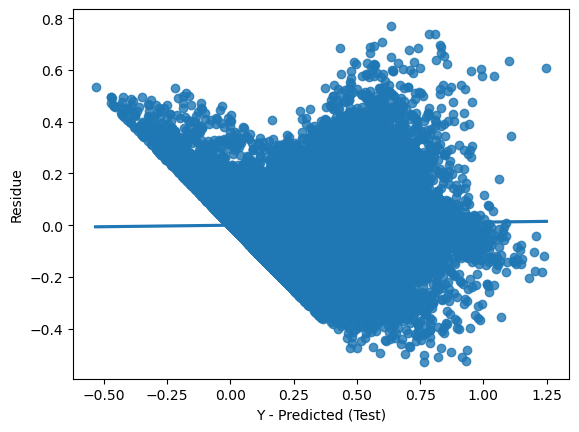

In [132]:
splot = sns.regplot(x=y_test_predict, y=residual)
splot.set_xlabel('Y - Predicted (Test)')
splot.set_ylabel('Residue')
plt.show()

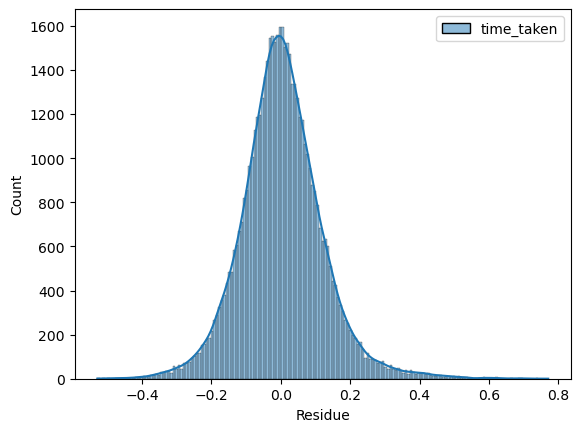

In [133]:
splot = sns.histplot(residual, kde=True)
splot.set_xlabel('Residue')
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [137]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
X_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746           0.1  0.294650                 0.2        0.375472   
173338          0.0  0.139095                 0.0        0.300000   
37592           0.0  0.312757                 0.0        0.452830   
42763           0.5  0.076214                 0.4        0.112830   
27506           0.2  0.576132                 0.4        0.452830   

        total_busy_dashers  total_outstanding_orders  distance  delivery_hr  \
94746             0.092199                  0.095890  0.376147     0.782609   
173338            0.567376                  0.648402  0.506255     0.086957   
37592             0.177305                  0.155251  0.588824     1.000000   
42763             0.645390                  0.616438  0.289408     0.043478   
27506             0.120567                  0.105023  0.166806     0.217391   

        delivery_day  is_weekend  
94746       0.000000           0  
173338      0.833333           1  
37592       1.000000           1  
42763       0.833333           1  
27506       0.833333           1

In [139]:
y_train.head()

time_taken
94746     0.214286
173338    0.214286
37592     0.285714
42763     0.190476
27506     0.285714

In [140]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [141]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', False, 3),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', False, 2),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('delivery_hr', True, 1),
 ('delivery_day', True, 1),
 ('is_weekend', True, 1)]

In [142]:
col = X_train.columns[rfe.support_]
col

Index(['subtotal', 'num_distinct_items', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_hr', 'delivery_day',
       'is_weekend'],
      dtype='object')

In [143]:
X_train.columns[~rfe.support_]

Index(['total_items', 'max_item_price'], dtype='object')

In [144]:
# Build the final model with selected number of features
X_train_rfe = X_train[col]


In [145]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [146]:
X_train_rfe_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110758 entries, 94746 to 38408
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     110758 non-null  float64
 1   subtotal                  110758 non-null  float64
 2   num_distinct_items        110758 non-null  float64
 3   total_busy_dashers        110758 non-null  float64
 4   total_outstanding_orders  110758 non-null  float64
 5   distance                  110758 non-null  float64
 6   delivery_hr               110758 non-null  float64
 7   delivery_day              110758 non-null  float64
 8   is_weekend                110758 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.5 MB


In [147]:
lr_model2_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()

In [148]:
lr_model2_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 3.022e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:12:47   Log-Likelihood:                 84131.
No. Observations:              110758   AIC:                        -1.682e+05
Df Residuals:                  110749   BIC:                        -1.682e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0513      0.001     35.238      0.000       0.048       0.054
subtotal                     0.2167      0.002     98.931      0.000       0.212       0.221
num_distinct_items           0.0395      0.002     22.685      0.000       0.036       0.043
total_busy_dashers          -1.1735      0.004   -271.077      0.000      -1.182      -1.165
total_outstanding_orders     1.2582      0.004    296.709      0.000       1.250       1.266
distance                     0.5291      0.002    281.334      0.000       0.525       0.533
delivery_hr                 -0.1116      0.001   -114.050      0.000      -0.113      -0.110
delivery_day                -0.0831      0.002    -49.133      0.000      -0.086      -0.080
is_weekend                   0.0918      0.001     75.748      0.000       0.089       0.094
==============================================================================
Omnibus:                     3022.175   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6066.428
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                       4.084   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [151]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



In [152]:
y_train_predict = lr_model2_rfe.predict(X_train_rfe_sm)
y_train_predict = y_train_predict.values.reshape(-1, 1)

In [153]:
y_train_predict.shape

(110758, 1)

In [154]:
r2 = r2_score(y_train, y_train_predict)
r2

0.6858035643692466

In [155]:
residual = y_train - y_train_predict

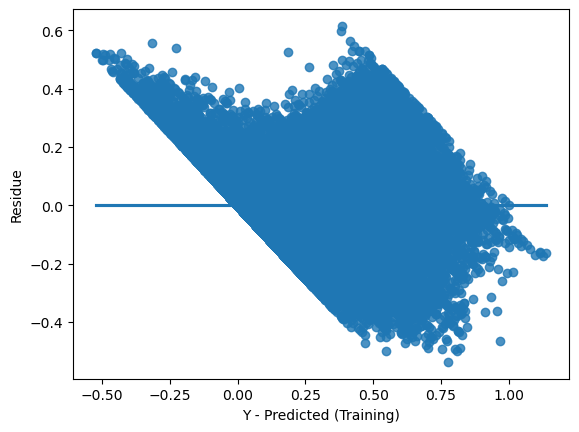

In [156]:
splot = sns.regplot(x=y_train_predict, y=residual)
splot.set_xlabel('Y - Predicted (Training)')
splot.set_ylabel('Residue')
plt.show()

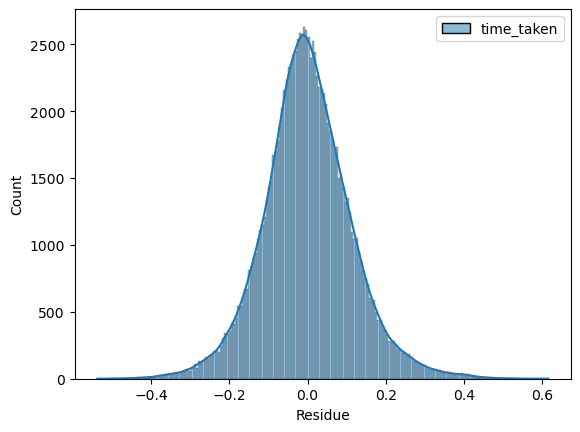

In [157]:
splot = sns.histplot(residual, kde=True)
splot.set_xlabel('Residue')
plt.show()

[Your inferences here:]
- R2 is 0.69 which shows that the linear model fits the data.
- P-values in the Model summary shows that all the features are significant in the final model.
- The residues the normally distributed.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [161]:
# Compare the scaled vs unscaled features used in the final model



Preparing unscaled model:

In [163]:
X_train_unscaled = train_data_1.drop('time_taken', axis=1)
y_train_unscaled = train_data_1[['time_taken']]
print(X_train.shape)
print(y_train.shape)

(110758, 10)
(110758, 1)


In [164]:
X_train_unscaled_rfe = X_train_unscaled[col]

In [165]:
X_train_unscaled_sm = sm.add_constant(X_train_unscaled_rfe)

In [166]:
X_train_unscaled_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110758 entries, 94746 to 38408
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     110758 non-null  float64
 1   subtotal                  110758 non-null  int64  
 2   num_distinct_items        110758 non-null  int64  
 3   total_busy_dashers        110758 non-null  float64
 4   total_outstanding_orders  110758 non-null  float64
 5   distance                  110758 non-null  float64
 6   delivery_hr               110758 non-null  int32  
 7   delivery_day              110758 non-null  int32  
 8   is_weekend                110758 non-null  int64  
dtypes: float64(4), int32(2), int64(3)
memory usage: 7.6 MB


In [167]:
X_train_unscaled_sm.describe()

const       subtotal  num_distinct_items  total_busy_dashers  \
count  110758.0  110758.000000       110758.000000       110758.000000   
mean        1.0    2334.844183            2.431247           40.536693   
std         0.0    1235.736654            1.252158           30.978714   
min         1.0       0.000000            1.000000           -4.000000   
25%         1.0    1358.000000            1.000000           15.000000   
50%         1.0    2085.000000            2.000000           33.000000   
75%         1.0    3080.000000            3.000000           61.000000   
max         1.0    6075.000000            6.000000          137.000000   

       total_outstanding_orders       distance    delivery_hr   delivery_day  \
count             110758.000000  110758.000000  110758.000000  110758.000000   
mean                  55.566957      21.728240       8.752632       3.218269   
std                   49.451306       8.687087       8.751632       2.031960   
min                   -6.000000       0.000000       0.000000       0.000000   
25%                   17.000000      15.240000       2.000000       1.000000   
50%                   39.000000      21.680000       3.000000       3.000000   
75%                   82.000000      28.000000      19.000000       5.000000   
max                  213.000000      47.960000      23.000000       6.000000   

          is_weekend  
count  110758.000000  
mean        0.339334  
std         0.473486  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [168]:
lr_model3_unscaled_rfe = sm.OLS(y_train_unscaled, X_train_unscaled_sm).fit()

In [169]:
lr_model3_unscaled_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 3.022e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:12:54   Log-Likelihood:            -3.2985e+05
No. Observations:              110758   AIC:                         6.597e+05
Df Residuals:                  110749   BIC:                         6.598e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.8737      0.062    544.854      0.000      33.752      33.996
subtotal                     0.0015   1.51e-05     98.931      0.000       0.001       0.002
num_distinct_items           0.3320      0.015     22.685      0.000       0.303       0.361
total_busy_dashers          -0.3495      0.001   -271.077      0.000      -0.352      -0.347
total_outstanding_orders     0.2413      0.001    296.709      0.000       0.240       0.243
distance                     0.4633      0.002    281.334      0.000       0.460       0.467
delivery_hr                 -0.2037      0.002   -114.050      0.000      -0.207      -0.200
delivery_day                -0.5820      0.012    -49.133      0.000      -0.605      -0.559
is_weekend                   3.8566      0.051     75.748      0.000       3.757       3.956
==============================================================================
Omnibus:                     3022.175   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6066.428
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                       4.084   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_**How changes in features affect time_taken?**_

**Positive Impact (increase delivery time):**

*Distance (+0.4633):* Each additional unit of distance increases delivery time by ~0.46 minutes

*Number of distinct items (+0.3320):* More items in an order increase delivery time

*Outstanding orders (+0.2413):* Higher order volume in the system increases delivery time

*Weekend delivery (+3.8566):* Weekend deliveries take ~3.9 minutes longer

*Order subtotal (+0.0015):* Larger orders slightly increase delivery time

**Negative Impact (decrease delivery time):**

*Busy dashers (-0.3495):* More available dashers reduce delivery time

*Delivery hour (-0.2037):* Later hours in the day reduce delivery time

*Delivery day (-0.5820):* Later days (Thursday, Friday) in some cycle reduce delivery time

_**Affect of feature scaling on coefficients:**_

- In linear models, coefficients of unscaled features are not directly comparable due to differing units and scales.
- After scaling, coefficients reflect the relative importance of each feature more meaningfully, since all features are on a comparable scale.
- After scaling:
  - _Total outstanding orders (+1.2582)_ becomes the strongest positive predictor in place of _Weekend delivery_ in case on unscaled feature.
  - _Total busy dashers (-1.1735)_ becomes the strongest negative predictor in place of _Delivery day_ in case of unscaled feature.
- This demonstrates that scaled features offer better explaination of time_taken compared to unscaled features.

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [175]:
# Analyze the effect of a unit change in a feature, say 'total_items'
for i in feat_list:
    if i != 'const':
        print("One unit change in", i, "causes the time_taken change by: ", 
          (1/(train_data_1[i].max() - train_data_1[i].min())) * lr_model2_rfe.params[feat_list[1]], " units")

One unit change in total_items causes the time_taken change by:  0.021670952871238  units
One unit change in subtotal causes the time_taken change by:  3.567235040533004e-05  units
One unit change in num_distinct_items causes the time_taken change by:  0.043341905742476  units
One unit change in max_item_price causes the time_taken change by:  8.177718064618112e-05  units
One unit change in total_busy_dashers causes the time_taken change by:  0.0015369470121445387  units
One unit change in total_outstanding_orders causes the time_taken change by:  0.0009895412269971687  units
One unit change in distance causes the time_taken change by:  0.004518547304261467  units
One unit change in delivery_hr causes the time_taken change by:  0.00942215342227739  units
One unit change in delivery_day causes the time_taken change by:  0.03611825478539666  units
One unit change in is_weekend causes the time_taken change by:  0.21670952871237997  units


_**Scaled features:**_
- Positive Impact (increase delivery time):
  - _Distance (+0.5291):_ Each additional unit of distance increases delivery time significantly
  - _Total outstanding orders (+1.2582):_ Strongest positive predictor - higher order volume dramatically increases delivery time
  - _Order subtotal (+0.2167):_ Larger orders increase delivery time
  - _Number of distinct items (+0.0395):_ More items in an order increase delivery time
  - _Weekend delivery (+0.0918):_ Weekend deliveries take longer</br>
- Negative Impact (decrease delivery time):
  - _Total busy dashers (-1.1735):_ Strongest negative predictor - counterintuitively, more busy dashers reduce delivery time
  - _Delivery hour (-0.1116):_ Later hours in the day reduce delivery time
  - _Delivery day (-0.0831):_ Later days reduce delivery time

_**Unscaled Features:**_
- Positive Impact (increase delivery time):
  - _Distance (+0.4633):_ Each additional unit of distance increases delivery time by ~0.46 minutes
  - _Number of distinct items (+0.3320):_ More items in an order increase delivery time
  - _Outstanding orders (+0.2413):_ Higher order volume in the system increases delivery time
  - _Weekend delivery (+3.8566):_ Weekend deliveries take ~3.9 minutes longer
  - _Order subtotal (+0.0015):_ Larger orders slightly increase delivery time
- Negative Impact (decrease delivery time):
  - _Busy dashers (-0.3495):_ More available dashers reduce delivery time
  - _Delivery hour (-0.2037):_ Later hours in the day reduce delivery time
  - _Delivery day (-0.5820):_ Later days (Thursday, Friday) in some cycle reduce delivery time

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Following are the categorical data in the dataset:
> - market_id
> - store_primary_category
> - order_protocol
> - is_weekend</br>
> </br>From the analysis it looks like that on the category `is_weekend` is statistically significant in affecting the target variable `time_taken`.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> `test_size = 0.2` denotes that 20% of the total dataset will be split for test data, while 80% will be split for training data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap, it looks like variable `distance` is the highly correlated feature with `time_taken` with the correlation of `0.46`.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> I used box plot to detect outliers visually.</br>
> I used Z-Score methodology to filter out outliers that were 2 or 3 deviations away from the mean.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model (`lr_model2_rfe`), I found following top three features significantly affecting the delivery time:
> - total_busy_dashers
> - total_outstanding_orders
> - distance



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression algorithm is a way of finding best straight line (`y = b0 + b1x1 + b2x2 ...`) fitting any data. Linear regression algorithm works when:
> - There is a linear correlation between the dependend and independent variables.
> - The errors (actual - predicted value) are normally distributed with mean=0.
> - The errors (actual - predicted value) are independent of each other that is, should be random.
> - The errors (actual - predicted value) should have constant variance throughout the feature data values.</br></br>
> If these are true then there will be a good chance that a line can be drawn thought the data that will be able to predict the trend.</br>
> The coefficients values are derived using gradient descent method.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression deals with only one dependent variable (`y = b0 + b1x1`) while multiple linear regression deals with seleral dependent variables (`y = b0 + b1x1 + b2x2 + ... bnxn`).</br></br>
> Simple linear regression can be visualized using 2D plot, while multiple linear regression requires 3D or higher dimention plots for visualization.</br></br>
> Multicollinearity is applicable in multiple linear regression but not in simple linear regression.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost function in linear regression is the average of sum of squares of error terms, where `error = actual value - predicted value`.</br></br>
`cost_function = 1/n SUM[(y - y_pred)^2]`</br></br>
Cost function is used to measure performance of the model. For better model performance, cost function should be reduced.</br></br>
Cost function is minimized using gradient descent.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
> Overfitting means that the regression model 'learns' the training data and when it is run on test data, it performs poorly because it fails to generalize the general data trend. However the performance is very good on training data.</br></br>
> In overfitting the model is very complex than it is required.</br></br>
> Underfitting means that the regression model could not generalize to the training data itself and hence performs poorly both on training data as well as test data.</br></br>
> In underfitting the model is very simple than it is required.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plot help us to confirm following three assumptions of linear regression:
> - The residues (`y_actual - y_predicted`) are randomly destributed around the 0 value, that is, there is no particular pattern found in residue distribution and residues are not dependent on each other.
> - The residues are normally distributed with mean=0.
> - The variance is constant throughout the data (homoscedaticity).
> </br></br>If all the above are true then the quality of model fit is good.